# Compréhension du jeu de données

## Features

In [2]:
import pandas as pd

features = pd.read_csv('alt_acsincome_ca_features_85.csv')
columns = features.columns
features

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
0,41.0,4.0,24.0,1.0,2555.0,6.0,1.0,60.0,2.0,1.0
1,77.0,7.0,22.0,1.0,4920.0,39.0,0.0,35.0,1.0,1.0
2,38.0,1.0,18.0,1.0,440.0,6.0,1.0,50.0,1.0,1.0
3,30.0,1.0,22.0,5.0,1555.0,6.0,2.0,80.0,1.0,6.0
4,36.0,1.0,16.0,1.0,4030.0,314.0,1.0,70.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
166310,25.0,1.0,20.0,1.0,4720.0,6.0,7.0,8.0,2.0,1.0
166311,34.0,1.0,22.0,1.0,110.0,210.0,0.0,40.0,1.0,6.0
166312,54.0,3.0,18.0,1.0,7700.0,6.0,1.0,50.0,1.0,1.0
166313,39.0,1.0,16.0,5.0,9130.0,6.0,0.0,50.0,1.0,1.0


## Labels

In [3]:
labels = pd.read_csv('alt_acsincome_ca_labels_85.csv')
labels

,PINCP
0,True
1,True
2,False
3,True
4,False
...,...
166310,False
166311,True
166312,True
166313,True


## Explore dataset

In [4]:
len(features)

166315

In [5]:
len(features['AGEP'])

166315

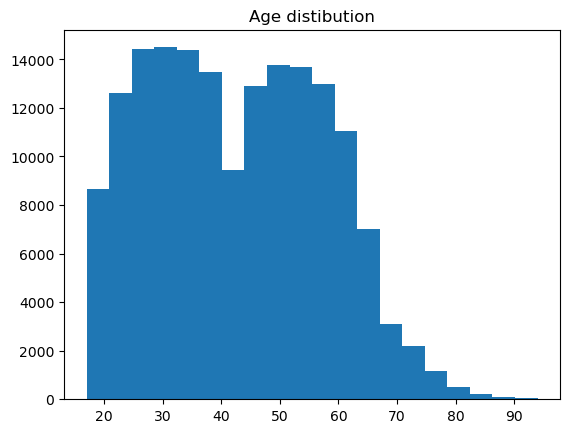

In [6]:
import matplotlib.pyplot as plt

plt.hist(features['AGEP'], bins=20)
plt.title("Age distibution");

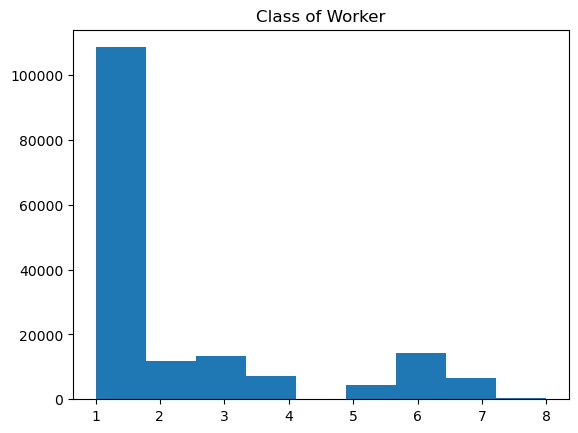

In [7]:
plt.hist(features['COW'], bins=9)
plt.title("Class of Worker");

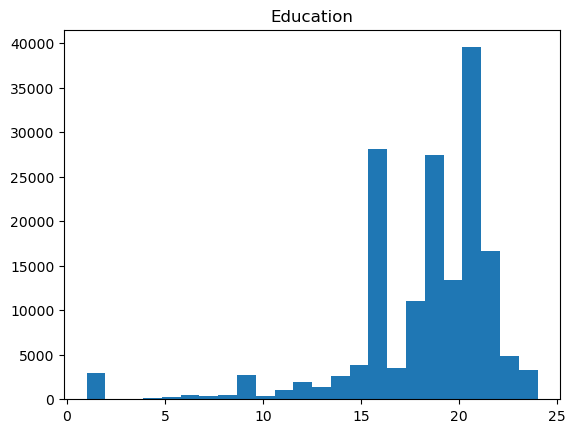

In [8]:
plt.hist(features['SCHL'], bins=24)
plt.title("Education");

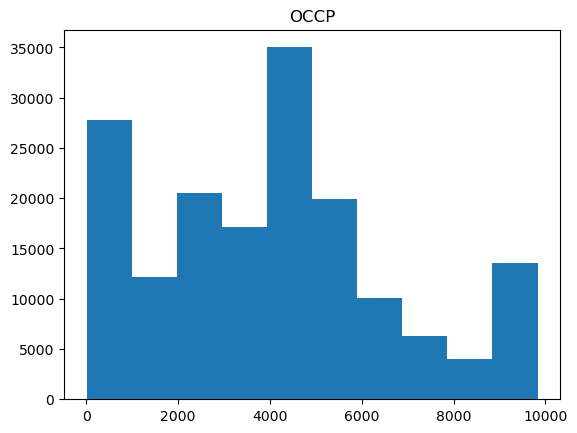

In [9]:
plt.hist(features['OCCP'])
plt.title("OCCP");

## Split train & test sets

In [18]:
import sklearn
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.2,
    shuffle=True
)

In [20]:
print(f"X_train length: {len(X_train)}")
print(f"X_test length: {len(X_test)}")
print(f"y_train length: {len(y_train)}")
print(f"y_test length: {len(y_test)}")

X_train length: 133052
X_test length: 33263
y_train length: 133052
y_test length: 33263


## Data preparation

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.to_numpy())
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns)

X_test_scaled = scaler.transform(X_test.to_numpy())
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns)

## Save Scaler

In [22]:
import joblib

joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

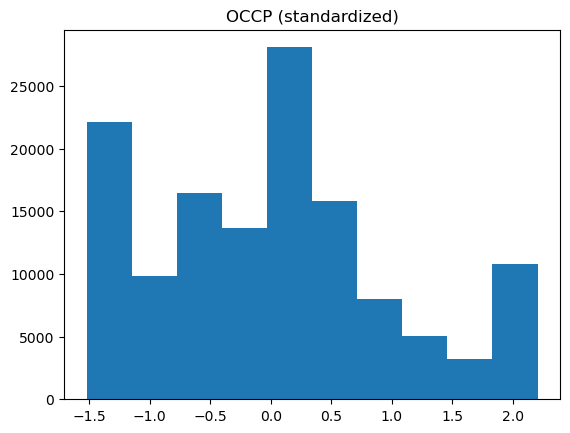

In [23]:
plt.hist(X_train_scaled['OCCP'])
plt.title("OCCP (standardized)");

## Recherche de bons modèles

In [24]:
from sklearn.ensemble import RandomForestClassifier, \
                             AdaBoostClassifier, \
                             GradientBoostingClassifier, \
                             StackingClassifier
                             
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score

## Random Forest (default)

In [25]:
random_forest_default = RandomForestClassifier()
random_forest_default.fit(X_train_scaled, y_train)

/tmp/ipykernel_36664/309182599.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_default.fit(X_train_scaled, y_train)


RandomForestClassifier()

In [26]:
val_scores = cross_val_score(random_forest_default, X_test_scaled, y_test, cv=5)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:

In [27]:
import numpy as np

In [28]:
print(val_scores)
np.mean(val_scores)

[0.80384789 0.80369758 0.8095596  0.81043295 0.80832832]


0.8071732680377215

In [29]:
y_pred = random_forest_default.predict(X_test_scaled)

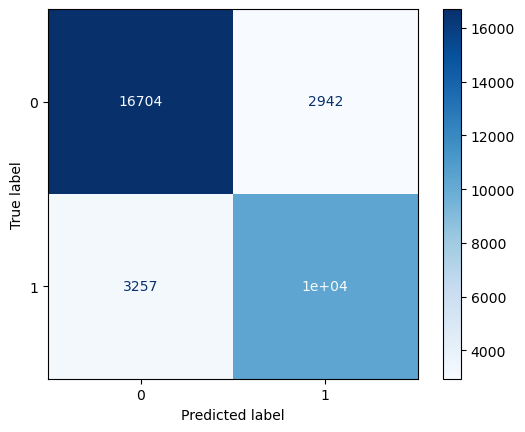

In [30]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');

## AdaBoost (default)

In [31]:
adaboost_default = AdaBoostClassifier()
adaboost_default.fit(X_train_scaled, y_train)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [32]:
val_scores = cross_val_score(adaboost_default, X_test_scaled, y_test, cv=5)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expec

In [33]:
print(val_scores)
np.mean(val_scores)

[0.79768525 0.80625282 0.80850744 0.80637402 0.80637402]


0.8050387118005622

In [34]:
y_pred = adaboost_default.predict(X_test_scaled)

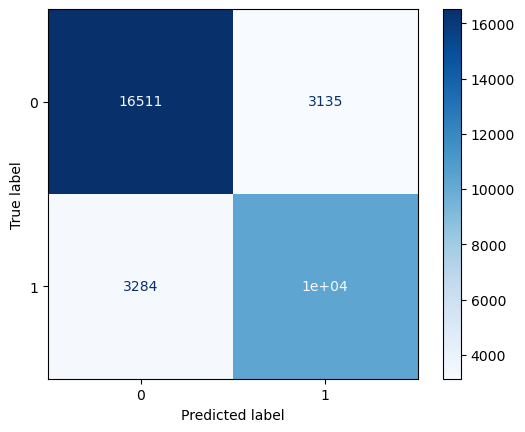

In [35]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');

## Gradient Boosting (default)

In [36]:
gradient_boosting_default = GradientBoostingClassifier()
gradient_boosting_default.fit(X_train_scaled, y_train)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [37]:
val_scores = cross_val_score(gradient_boosting_default, X_test_scaled, y_test, cv=5)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [38]:
print(val_scores)
np.mean(val_scores)

[0.8041485  0.81016083 0.81196453 0.81389056 0.81118461]


0.8102698053559406

In [39]:
y_pred = gradient_boosting_default.predict(X_test_scaled)

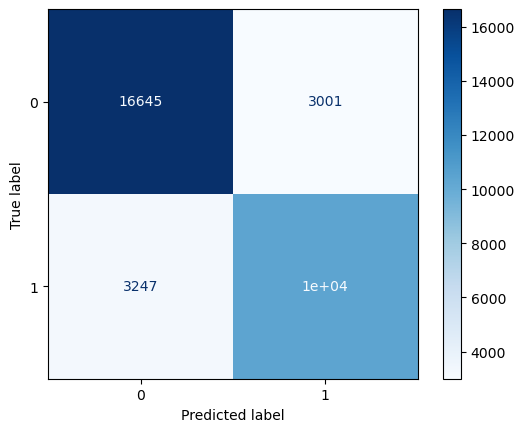

In [40]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');

## Stacking (default)

In [41]:
stacking_default = StackingClassifier(estimators=[("forest", random_forest_default),
                                                  ("ada", adaboost_default),
                                                  ("gradient", gradient_boosting_default)])
stacking_default.fit(X_train_scaled, y_train)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(estimators=[('forest', RandomForestClassifier()),
                               ('ada', AdaBoostClassifier()),
                               ('gradient', GradientBoostingClassifier())])

In [42]:
val_scores = cross_val_score(stacking_default, X_test_scaled, y_test, cv=5)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y

In [43]:
print(val_scores)
np.mean(val_scores)


[0.80820682 0.81001052 0.81482038 0.8170475  0.80923031]


0.8118631077051311

In [44]:
y_pred = stacking_default.predict(X_test_scaled)

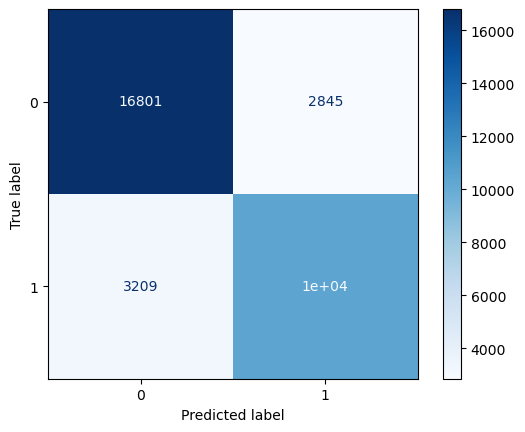

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');

***faire tableau accuracy / tp / fp / tn / fn /f1 score etc***

# Grid Search

In [16]:
from sklearn.model_selection import GridSearchCV

## Random Forest

In [ ]:
random_forest_parameters = {
    "n_estimators": (10, 100),
    "criterion": ("gini", "entropy", "log_loss"),
    "max_depth": (None, 10, 20),
    "min_samples_leaf": (1, 2, 10),
}

In [ ]:
random_forest = RandomForestClassifier()
random_forest_best = GridSearchCV(random_forest, random_forest_parameters)

In [ ]:
random_forest_best.fit(X_train_scaled, y_train)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'n_estimators': (10, 100)})

In [ ]:
val_scores_random_forest_best = cross_val_score(random_forest_best, X_test_scaled, y_test, cv=5)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:

In [ ]:
print(val_scores_random_forest_best)
np.mean(val_scores_random_forest_best)
print(random_forest_best.best_params_)

[0.8077559  0.80640313 0.81316699 0.81464221 0.80847865]


0.8100893768485165

In [ ]:
y_pred = random_forest_best.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');

In [ ]:
joblib.dump(random_forest_best.best_estimator_,
            "RandomForest_BestModel_xxxx.joblib")

['RandomForest_BestModel_08101.joblib']

## AdaBoost

In [ ]:
adaboost_parameters = {
    "n_estimators": (50, 100, 500),
    "learning_rate": (0.5, 1.),
}

In [ ]:
adaboostClassifier = AdaBoostClassifier()
adaboost_best = GridSearchCV(adaboostClassifier, adaboost_parameters)

In [ ]:
adaboost_best.fit(X_train_scaled, y_train)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expec

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ('SAMME', 'SAMME.R'),
                         'learning_rate': (0.5, 1.0),
                         'n_estimators': (50, 100)})

In [ ]:
val_scores_adabest = cross_val_score(adaboost_best, X_test_scaled, y_test, cv=5)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expec

In [ ]:
print(val_scores_adabest)
print(np.mean(val_scores_adabest))
print(adaboost_best.best_params_)

[0.81316699 0.80670374 0.81436946 0.81614552 0.80802766]


0.811682674678521

In [ ]:
y_pred = adaboost_best.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');

In [ ]:
joblib.dump(adaboost_best.best_estimator_,
            "AdaBoost_BestModel_xxxx.joblib")

['AdaBoost_BestModel_08117.joblib']

## Gradient Boosting

In [60]:
gradient_boosting_parameters = {
    "loss": ("log_loss", "exponential"),
    "learning_rate": (0.1, 0.5),
    "n_estimators": (50, 100),
    "max_depth": (2, 3, 5)
}

In [ ]:
gradientBoostingClassifier = GradientBoostingClassifier()
gradientboost_best = GridSearchCV(gradientBoostingClassifier, gradient_boosting_parameters)

In [ ]:
gradientboost_best.fit(X_train_scaled, y_train)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': (0.1, 0.5),
                         'loss': ('log_loss', 'exponential'),
                         'max_depth': (2, 3, 5), 'n_estimators': (50, 100)})

In [63]:
val_scores_gradientbest = cross_val_score(gradientboost_best, X_test_scaled, y_test, cv=5)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

KeyboardInterrupt: 

In [ ]:
print(val_scores)
np.mean(val_scores)
print(gradientboost_best.best_params_)

In [ ]:
y_pred = gradientboost_best.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');

In [ ]:
joblib.dump(gradientboost_best.best_estimator_,
            "GradientBoost_BestModel_xxxx.joblib")

## Stacking of best models

In [ ]:
stacking_best = StackingClassifier(estimators=[("forest", random_forest_best),
                                                  ("ada", adaboost_best),
                                                  ("gradient", gradientboost_best)])
stacking_best.fit(X_train_scaled, y_train)

In [ ]:
val_scores_stacking_best = cross_val_score(stacking_best, X_test_scaled, y_test, cv=5)

In [ ]:
print(val_scores_stacking_best)
np.mean(val_scores_stacking_best)
print(stacking_best.best_params_)

In [ ]:
y_pred = stacking_best.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');

In [ ]:
joblib.dump(stacking_best.best_estimator_,
            "Stacking_BestModel_xxxx.joblib")

## 4. Interprétabilité et Équité

In [18]:
labels

,PINCP
0,True
1,True
2,False
3,True
4,False
...,...
166310,False
166311,True
166312,True
166313,True


In [46]:
from sklearn.feature_selection import r_regression

correlation_initiale = r_regression(features, labels)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
def plot_correlation(features, labels, title):
    correlation = r_regression(features, labels)
    norm = plt.Normalize(min(correlation), max(correlation))
    cmap = plt.cm.cividis
    colors = cmap(norm(correlation))

    plt.barh(features.columns, correlation, color=colors)
    plt.axvline(0, color='black', linewidth=1)
    plt.ylabel("Features")
    plt.xlabel("Labels")
    plt.title(title);

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


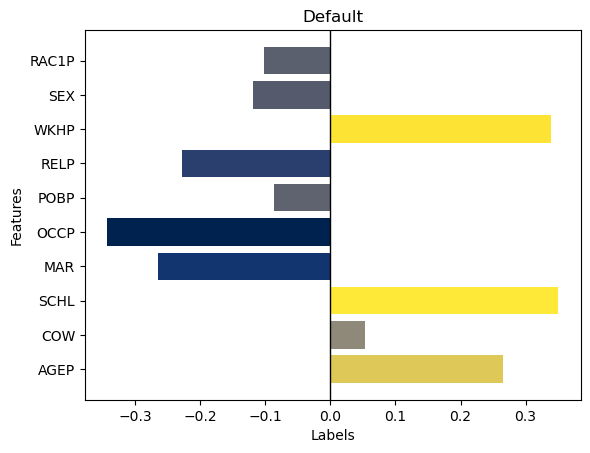

In [63]:
plot_correlation(features, labels, "Default")

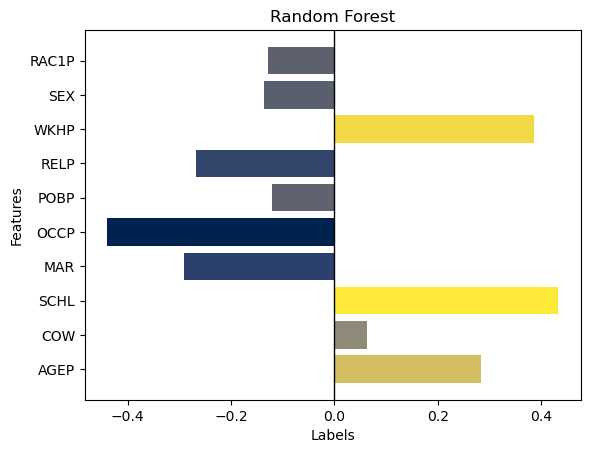

In [70]:
y_pred_random_forest_default = random_forest_default.predict(X_test_scaled)
plot_correlation(X_test_scaled, y_pred_random_forest_default, "Random Forest")

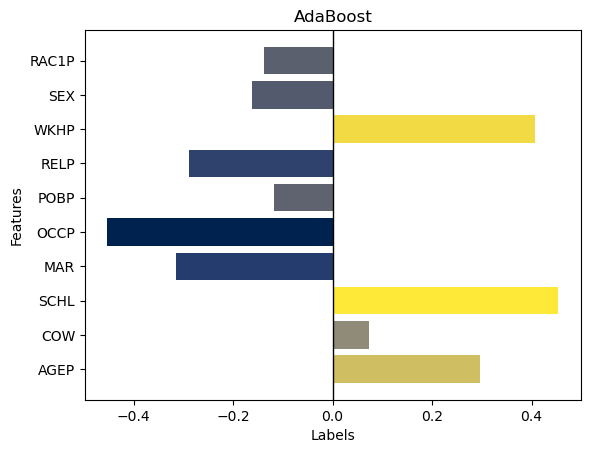

In [72]:
y_pred_adaboost_default = adaboost_default.predict(X_test_scaled)
plot_correlation(X_test_scaled, y_pred_adaboost_default, "AdaBoost")

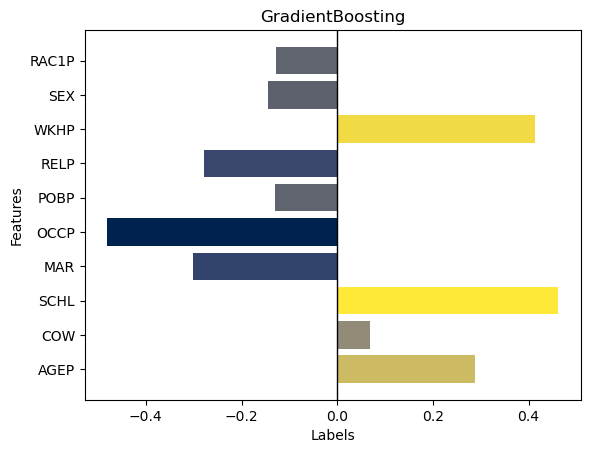

In [71]:
y_pred_gradient_boosting_default = gradient_boosting_default.predict(X_test_scaled)
plot_correlation(X_test_scaled, y_pred_gradient_boosting_default, "GradientBoosting")

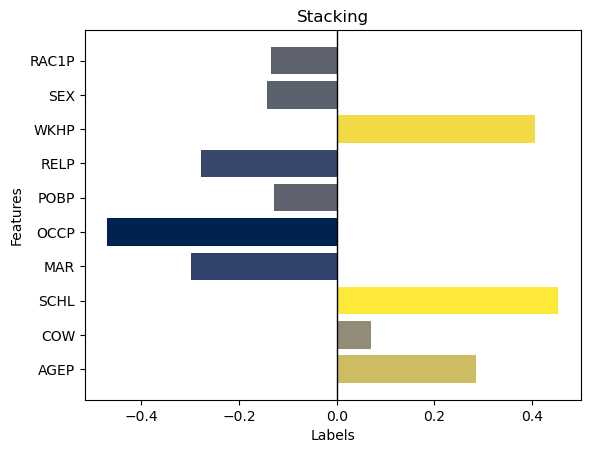

In [73]:
y_pred_stacking_default = stacking_default.predict(X_test_scaled)
plot_correlation(X_test_scaled, y_pred_stacking_default, "Stacking")

In [69]:
from sklearn.inspection import permutation_importance

In [74]:
results_random_forest_default = permutation_importance(
    random_forest_default,
    X_test_scaled,
    y_pred_random_forest_default
)

In [75]:
results_random_adaboost_default = permutation_importance(
    adaboost_default,
    X_test_scaled,
    y_pred_adaboost_default
)

In [76]:
results_gradient_boosting_default = permutation_importance(
    gradient_boosting_default,
    X_test_scaled,
    y_pred_gradient_boosting_default
)

In [78]:
results_stacking_default = permutation_importance(
    stacking_default,
    X_test_scaled,
    y_pred_stacking_default
)

In [94]:
def plot_importance(results, features, title):
    plt.barh(features.columns, results['importances_mean'], color='orange')
    plt.ylabel("Features")
    plt.xlabel("Importance")
    plt.title(title);

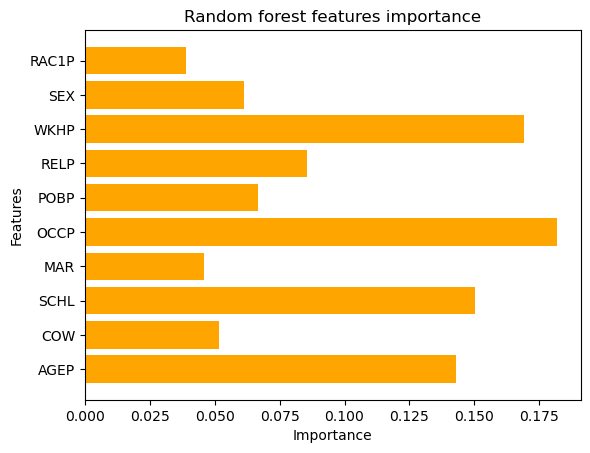

In [95]:
plot_importance(results_random_forest_default,
                X_test_scaled,
                "Random forest features importance")

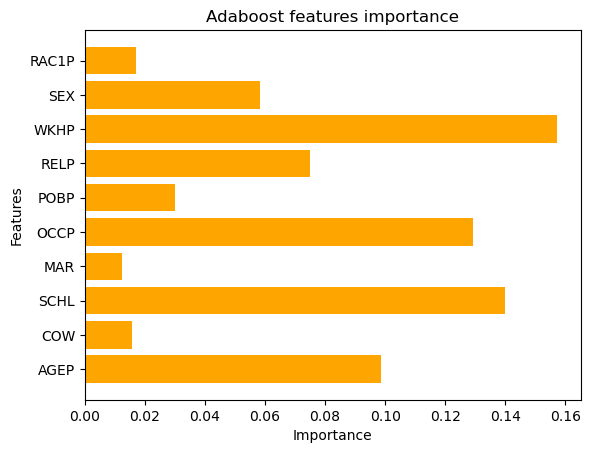

In [96]:
plot_importance(results_random_adaboost_default,
                X_test_scaled,
                "Adaboost features importance")

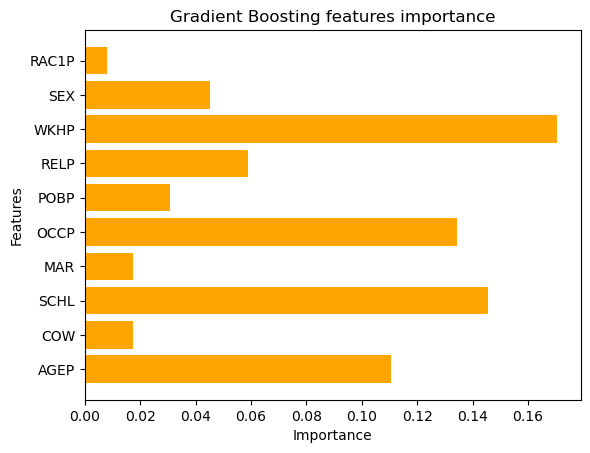

In [97]:
plot_importance(results_gradient_boosting_default,
                X_test_scaled,
                "Gradient Boosting features importance")

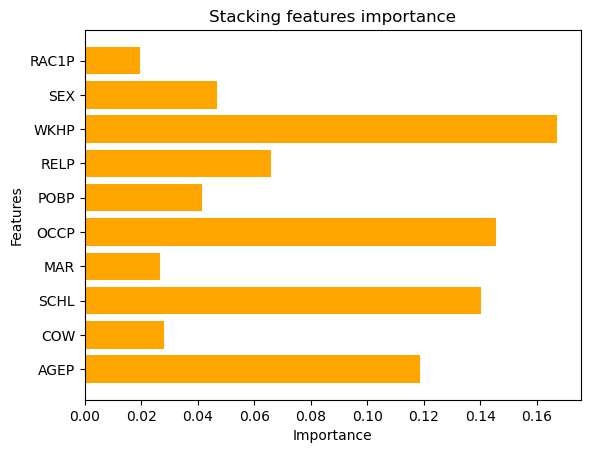

In [98]:
plot_importance(results_stacking_default,
                X_test_scaled,
                "Stacking features importance")

## Équité

In [148]:
def print_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    print(f"Postive predictions rate: {(fp + tp) / (tn + fp + fn + tp):.2f}")
    print(f"True positive rate: {tp / (fn + tp):.2f}")
    print(f"False positive rate: {tp / (fp + tn):.2f}")

In [105]:
print(f"total samples: {len(y_train)}")
print(f"> 50,000: {len(y_train[y_train['PINCP'] == 1])}")
print(f"Rate: {len(y_train[y_train['PINCP'] == 1]) * 100 / len(y_train):.2f}%")

total samples: 133052
> 50,000: 54586
Rate: 41.03%


In [107]:
train_set = X_train.join(y_train)
train_set

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
125139,49.0,1.0,20.0,1.0,800.0,303.0,0.0,40.0,2.0,8.0,True
82177,60.0,3.0,20.0,1.0,5250.0,247.0,1.0,40.0,2.0,6.0,False
153888,24.0,1.0,21.0,5.0,5260.0,6.0,2.0,15.0,2.0,1.0,False
117890,26.0,1.0,21.0,5.0,8740.0,242.0,0.0,5.0,2.0,6.0,False
138051,46.0,4.0,19.0,3.0,3602.0,303.0,0.0,11.0,2.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...
79975,48.0,1.0,16.0,1.0,4850.0,6.0,0.0,40.0,1.0,8.0,True
163755,58.0,1.0,18.0,1.0,9130.0,6.0,0.0,60.0,1.0,1.0,True
92350,32.0,1.0,16.0,1.0,7120.0,6.0,0.0,50.0,1.0,1.0,True
147638,54.0,2.0,23.0,1.0,350.0,6.0,1.0,40.0,2.0,8.0,True


In [115]:
print(f"Rate of males with income > $50000: {len(train_set[(train_set['SEX'] == 1) & (train_set['PINCP'] == True)]) * 100 / len(train_set[train_set['SEX'] == 1]):.2f}%")

Rate of males with income > $50000: 46.56%


In [114]:
print(f"Rate of females with income > $50000: {len(train_set[(train_set['SEX'] == 2) & (train_set['PINCP'] == True)]) * 100 / len(train_set[train_set['SEX'] == 2]):.2f}%")

Rate of females with income > $50000: 34.84%


In [127]:
test_set = X_test.join(y_test)

### Random forest

In [129]:
rf_test_set = X_test.copy(deep=True)
rf_test_set['PINCP'] = y_pred_random_forest_default

Postive predictions rate: 0.46
True positive rate: 0.79
False positive rate: 0.69


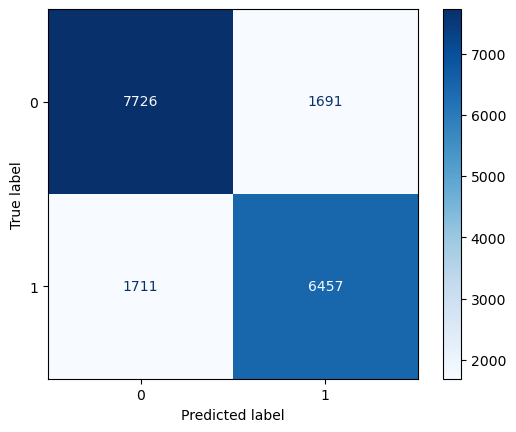

In [149]:
# Males
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 1, ['PINCP']], rf_test_set.loc[rf_test_set['SEX'] == 1, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');
print_metrics(cm)

Postive predictions rate: 0.33
True positive rate: 0.72
False positive rate: 0.38


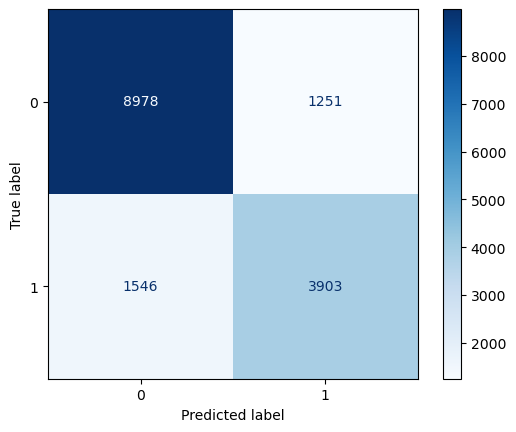

In [150]:
# Females
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 2, ['PINCP']], rf_test_set.loc[rf_test_set['SEX'] == 2, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');
print_metrics(cm)

### Adaboost

In [132]:
ab_test_set = X_test.copy(deep=True)
ab_test_set['PINCP'] = y_pred_adaboost_default

Postive predictions rate: 0.48
True positive rate: 0.80
False positive rate: 0.70


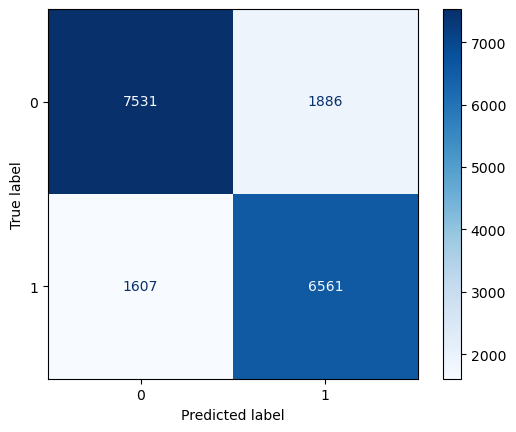

In [151]:
# Males
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 1, ['PINCP']], ab_test_set.loc[ab_test_set['SEX'] == 1, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');
print_metrics(cm)

Postive predictions rate: 0.32
True positive rate: 0.69
False positive rate: 0.37


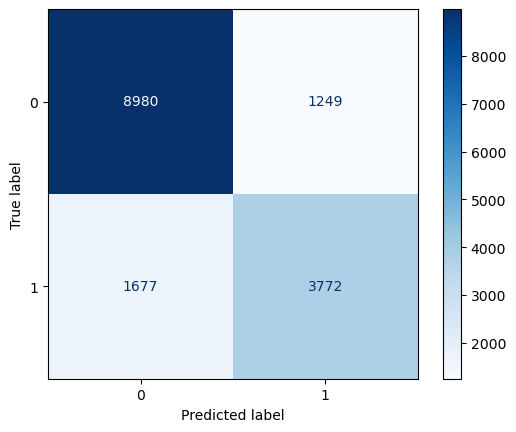

In [152]:
# Females
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 2, ['PINCP']], ab_test_set.loc[ab_test_set['SEX'] == 2, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');
print_metrics(cm)

### GradientBoosting

In [135]:
gb_test_set = X_test.copy(deep=True)
gb_test_set['PINCP'] = y_pred_gradient_boosting_default

Postive predictions rate: 0.47
True positive rate: 0.80
False positive rate: 0.69


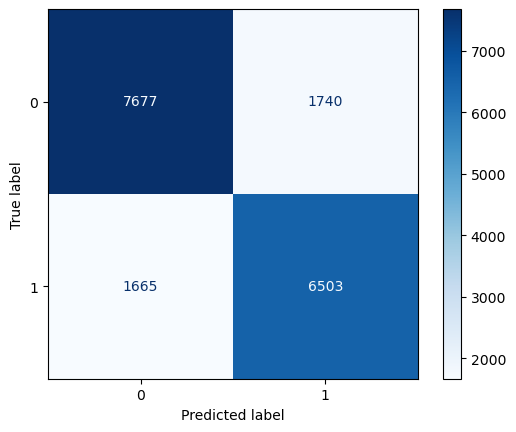

In [153]:
# Males
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 1, ['PINCP']], gb_test_set.loc[gb_test_set['SEX'] == 1, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');
print_metrics(cm)

Postive predictions rate: 0.33
True positive rate: 0.71
False positive rate: 0.38


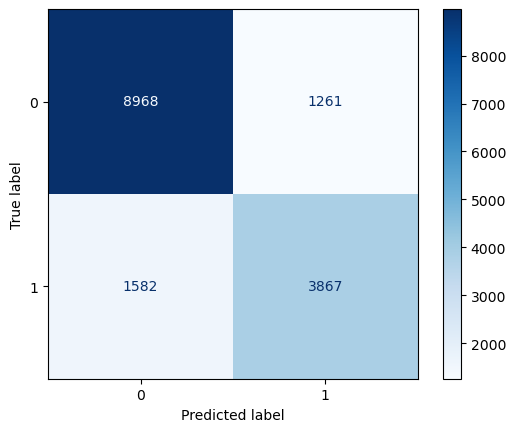

In [154]:
# Females
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 2, ['PINCP']], gb_test_set.loc[gb_test_set['SEX'] == 2, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');
print_metrics(cm)

### Stacking

In [138]:
st_test_set = X_test.copy(deep=True)
st_test_set['PINCP'] = y_pred_stacking_default

Postive predictions rate: 0.46
True positive rate: 0.80
False positive rate: 0.69


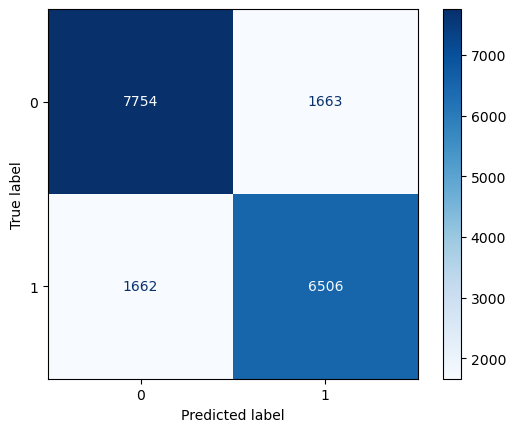

In [155]:
# Males
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 1, ['PINCP']], st_test_set.loc[st_test_set['SEX'] == 1, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');
print_metrics(cm)

Postive predictions rate: 0.32
True positive rate: 0.72
False positive rate: 0.38


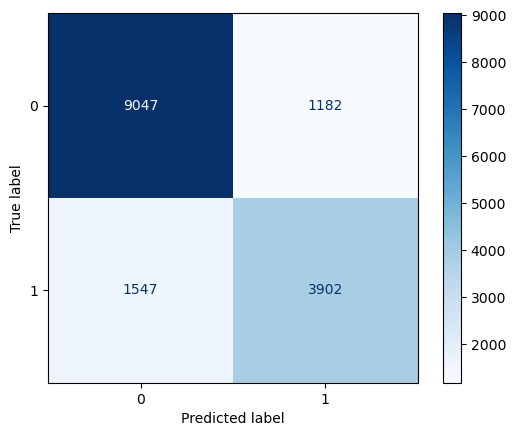

In [156]:
# Females
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 2, ['PINCP']], st_test_set.loc[st_test_set['SEX'] == 2, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');
print_metrics(cm)